# Using `dmLib` to define univariate and multivariate probability density functions

This tutorial explains how to define different probability density functions using both standard built-in distributions and user-defined custom probability density functions

## Simple 1-dimensional uniform distribution

We define a uniform distribution function given by:

$$
X \sim \mathcal{U}(c,r),
$$

where $c$ is the center of the distribution, and $r$ is the range. The distribution's density function $f(x)$ is given by

$$
f(x)={
    \begin{cases}
        0               &{\text{for }}x < c-\frac{r}{2} \\
        {\frac{1}{r}}  &{\text{for }}c-\frac{r}{2} \leq x \leq c+\frac{r}{2}  \\
        1               &{\text{for }}x > c+\frac{r}{2}
    \end{cases}
    }
$$

In [1]:
# Simple 1-dimensional uniform distribution
import numpy as np
from dmLib import UniformFunc

center = 10.0
range = 5.0

dist = UniformFunc(center=np.array([center]), interval=np.array([[range, ]]))
dist.random(10000) # draw 10000 samples from the distribution (they are stores inside)

array([12.06919296, 13.10179147, 13.79772695, ...,  5.36410736,
       14.69095015,  9.09991231])

We can check the approximate mean and standard deviations of the distribution and compare them with the exact values

Approximate mean: 9.993473, 
Exact mean: 10.000000
Approximate standard deviation: 2.773436, 
Exact standard deviation: 2.886751


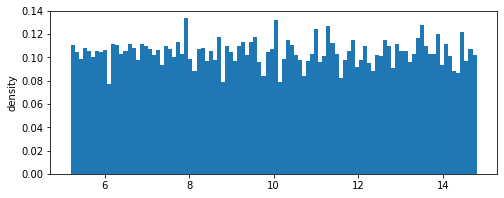

<Figure size 432x288 with 0 Axes>

In [2]:
mean = dist.samples.mean() # should be close to 10.0
std = dist.samples.std()

# true standard deviation
exact_std = np.sqrt(((range*2)**2)/ 12)

print('Approximate mean: %f, \nExact mean: %f' %(mean,center))
print('Approximate standard deviation: %f, \nExact standard deviation: %f' %(std,exact_std))

dist.view()

## 1-dimensional Gaussian distribution

We repeat the same exercise for the Gaussian distribution given by:

$$
X \sim \mathcal{N}(\mu,\sigma),
$$

where $\mu$ is the mean of the distribution, and $\sigma$ is the standard deviation.

In [3]:
# Simple 1-dimensional Gaussian distribution
from dmLib import GaussianFunc

mu = 10.0
sigma = 5.0

dist = GaussianFunc(mu=np.array([center]), sigma=np.array([[sigma**2, ]]))
dist.random(10000) # draw 10000 samples from the distribution (they are stores inside)

array([12.33780984,  7.29394816,  8.45848063, ...,  6.60838067,
       -1.183258  ,  8.64297244])

We can check the approximate mean and standard deviations of the distribution and compare them with the exact values

Approximate mean: 10.013612, 
Exact mean: 10.000000
Approximate standard deviation: 4.806228, 
Exact standard deviation: 5.000000


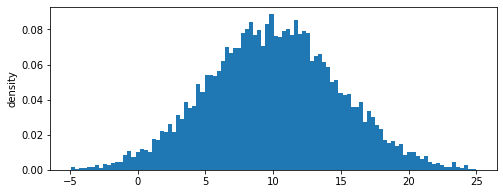

<Figure size 432x288 with 0 Axes>

In [4]:
mean = dist.samples.mean() # should be close to 10.0
std = dist.samples.std()

print('Approximate mean: %f, \nExact mean: %f' %(mean,mu))
print('Approximate standard deviation: %f, \nExact standard deviation: %f' %(std,sigma))

dist.view()

## 1-dimensional arbitrary distribution

We define a random distribution using a custom piecewise linear probability density function given by:

$$
f(x)={
    \begin{cases}
        -0.1x   &{\text{for }}x < 0 \\
        0.5x    &{\text{for }}0 \leq x \leq 50  \\
        1       &{\text{for }}x > 50
    \end{cases}
    }
$$

The density function can be defined by the user as follows. 
*The density function is divided by the total area to ensure that total probability of the density function does not exceed 1*

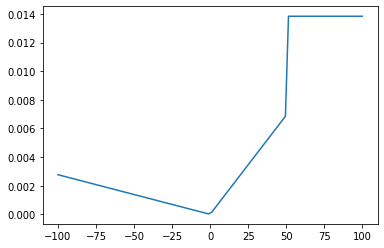

In [5]:
from dmLib import Distribution
import matplotlib.pyplot as plt

x = np.linspace(-100, 100, 100)  # 2D grid

# define a piecewise linear function
def density(x):
    density = np.empty(0)
    for value in x:
        if value <= 0:
            p = -0.1 * value
        elif value > 0 and value <= 50:
            p = 0.5 * value
        else:
            p = 50
        
        density = np.append(density,p)

    area = np.trapz(density, x)
    density /= area # normalize by the area
    
    return density

p = density(x)
plt.plot(x,p)


The values of the density function can be fed to the ``Distribution`` class and used for further sampling

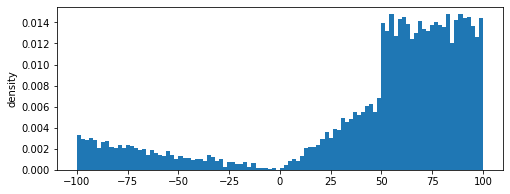

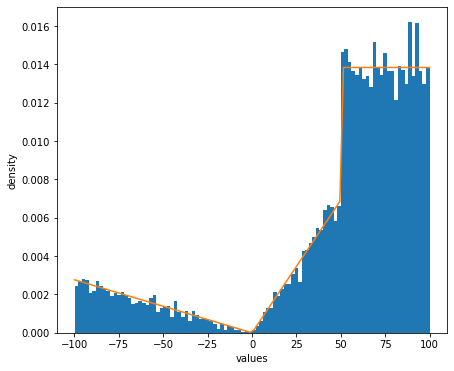

In [6]:
# define the arbitrary distribution by providing the density values
dist = Distribution(p,lb=-100,ub=100)
dist.random(10000)
dist.view()

# Compare with exact density function
fig, ax = plt.subplots(figsize=(7, 6))
ax.set_xlabel('values')
ax.set_ylabel('density')

ax.hist(dist.random(10000).squeeze(), bins=100, density=True)
ax.plot(np.linspace(-100,100,100),p)
plt.show()

## 2-dimensional Gaussian distribution

We define a 2-dimensional joint probability density function using the same built-in ``Guassian`` class. The joint PDF is given as follows

$$
X \sim \mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma}),
$$

where $\boldsymbol{\mu}$ is the vector of means, and $\boldsymbol{\Sigma}$ is the covariance matrix.

The density function can be defined by the user as follows. 

approximate means:
[9.97413398 4.97442997]
exact means:
[10.  5.]
approximate standard deviations (diagonal of cov matrix):
[0.9920326  1.88438444]
Exact standard deviations (diagonal of cov matrix):
[1. 2.]


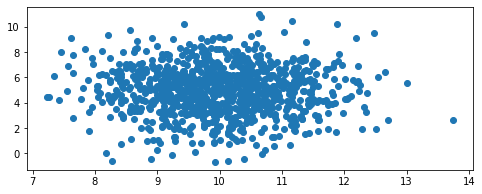

In [7]:
# 2D example
mean_1 = 10.0
mean_2 = 5.0
sd_1 = 1.0
sd_2 = 2.0
cov = 0.0

mean_vector = np.array([mean_1, mean_2])
cov_matrix = np.array([[sd_1 ** 2, cov], [0, sd_2 ** 2]])

dist = GaussianFunc(mu=mean_vector, sigma=cov_matrix)

dist.random(1000)
mean = dist.samples.mean(axis=1)
std = dist.samples.std(axis=1)

print('approximate means:')
print(mean)
print('exact means:')
print(mean_vector)

print('approximate standard deviations (diagonal of cov matrix):')
print(std)
print('Exact standard deviations (diagonal of cov matrix):')
print(np.sqrt(cov_matrix.diagonal()))

# View distribution
dist.view()

We can also introduce some covariance

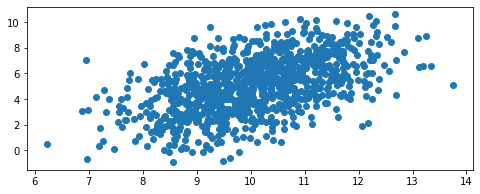

In [8]:
mean_1 = 10.0
mean_2 = 5.0
sd_1 = 1.0
sd_2 = 2.0
cov = 2.0

mean_vector = np.array([mean_1, mean_2])
cov_matrix = np.array([[sd_1 ** 2, cov], [0, sd_2 ** 2]])

dist = GaussianFunc(mu=mean_vector, sigma=cov_matrix)

dist.random(1000)

# View distribution
dist.view()

## Define a two dimensional arbitrary joint PDF

This requires more effort from the user to define the two-dimensional joint probability density function. We show this can be done to reproduce the 2D Gaussian function above. The ``Gaussian`` class provides the ``compute_density`` method for getting the density values.

We use the design of experiments library in ``dmLib`` to calculate a full-factorial 2D grid of density values first.

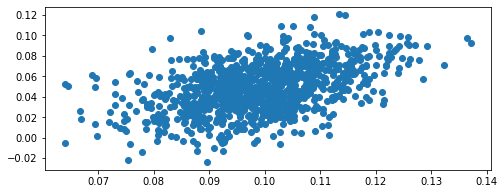

In [9]:
from dmLib import Design

x = Design(np.array([-100, -100]), np.array([100, 100]), 512, "fullfact").unscale()  # 2D grid
p = dist.compute_density(x)  # get density values
dist_arb = Distribution(p.reshape((512, 512)))
dist_arb.random(1000)

dist_arb.view()